In [2]:
# Import the neccessary Libraries
import pandas as pd
from textblob import TextBlob
import scipy

# Descripting Statistics
## Tasks
 * Obtain basic statistics for textual lengths (like headline length).
 * Count the number of articles per publisher to identify which publishers are most active.
 * Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.


In [3]:
# read the csv file to a pandas dataframe and see it
df = pd.read_csv("../src/csv-files/raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# compute the character length of headline column and keeping it in a headline_length column of the dataframe
df["headline_length"] = df["headline"].str.len()
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [5]:
# counting a number of publication each publisher published.
df["publisher"].value_counts()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1407328 non-null  int64 
 1   headline         1407328 non-null  object
 2   url              1407328 non-null  object
 3   publisher        1407328 non-null  object
 4   date             1407328 non-null  object
 5   stock            1407328 non-null  object
 6   headline_length  1407328 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 75.2+ MB


In [7]:
#  drop a column called Unnamed: 0 and setting the index to a date column
df.drop(columns="Unnamed: 0", inplace=True)
df.set_index(df["date"], inplace=True)
df.head()

,headline,url,publisher,date,stock,headline_length
date,,,,,,
2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [8]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

if df["date"].isna().sum() > 0:
    print("Some dates couldn't be converted and has been changed to NaT.")

publication_date_info = df["date"].describe()
publication_date_info

Some dates couldn't be converted and has been changed to NaT.


count                          1351341
mean     2015-07-06 06:39:44.879020288
min                2009-02-14 00:00:00
25%                2012-12-04 00:00:00
50%                2015-07-21 00:00:00
75%                2018-03-09 00:00:00
max                2020-06-03 00:00:00
Name: date, dtype: object

# Text Analysis(Sentiment analysis & Topic Medellling)
## Tasks
 * Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.
 * Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).



In [9]:
import sys
sys.path.append("../src/functions") 

from catagorize_sentiment import catagorize_sentiment
df["headline_ploarity"] = df["headline"].apply(catagorize_sentiment)
df.head()

,headline,url,publisher,date,stock,headline_length,headline_ploarity
date,,,,,,,
2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,neutral
2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,neutral
2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,neutral
2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,neutral
2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,neutral


In [24]:
from calculate_sentiment import calculate_setiment
df["polarity_figure"] = df["headline"].apply(calculate_setiment)
df.head()

,headline,url,publisher,stock,headline_length,headline_ploarity,significant_words,polarity_figure
date,,,,,,,,
NaT,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,neutral,"[stock, hit, high, friday]",0.0
NaT,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,neutral,"[stock, hit, high, wednesday]",0.0
NaT,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,neutral,"[71, biggest, mover, friday]",0.0
NaT,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,neutral,"[46, stock, move, friday, session]",0.0
NaT,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,neutral,"[b, secur, maintain, neutral, agil, technolog,...",0.0


In [10]:
from text_preprocessor import text_processor
df["significant_words"] = df["headline"].apply(text_processor)
df.head()

[nltk_data] Downloading package punkt to /home/kalu-coder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kalu-
[nltk_data]     coder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,headline,url,publisher,date,stock,headline_length,headline_ploarity,significant_words
date,,,,,,,,
2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,neutral,"[stock, hit, high, friday]"
2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,neutral,"[stock, hit, high, wednesday]"
2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,neutral,"[71, biggest, mover, friday]"
2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,neutral,"[46, stock, move, friday, session]"
2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,neutral,"[b, secur, maintain, neutral, agil, technolog,..."


# Time Series Analysis
## Tasks
 * How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
 * Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.


In [11]:
df["date"] = pd.to_datetime(df["date"])
df.set_index('date', inplace=True)


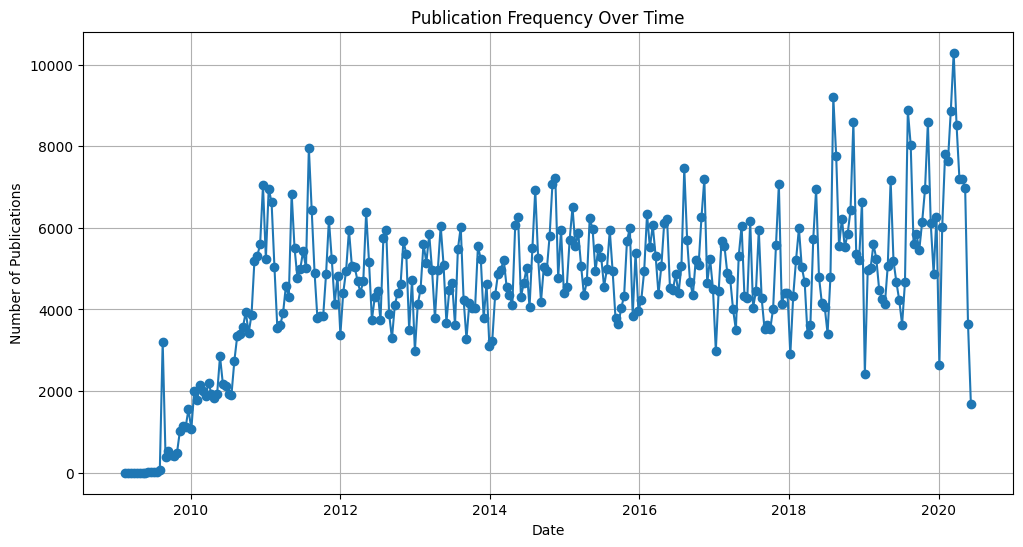

In [12]:


# Resample to get publication counts per week
publication_counts = df.resample('2W').size()

# Plot the publication frequency over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(publication_counts.index, publication_counts, marker='o', linestyle='-')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()


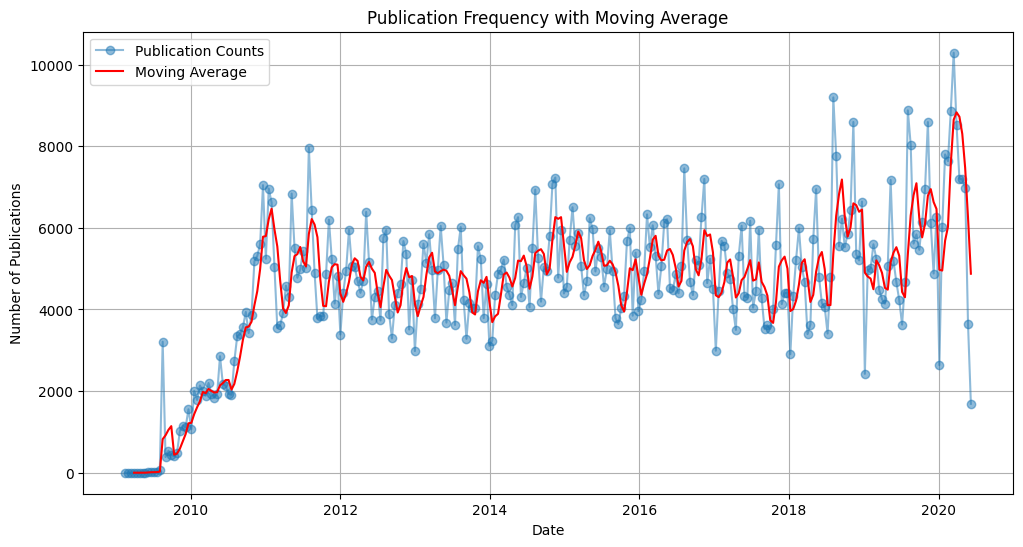

In [13]:
# Calculate a rolling average
rolling_avg = publication_counts.rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(publication_counts.index, publication_counts, label='Publication Counts', marker='o', linestyle='-', alpha=0.5)
plt.plot(rolling_avg.index, rolling_avg, color='red', label='Moving Average')
plt.title('Publication Frequency with Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()


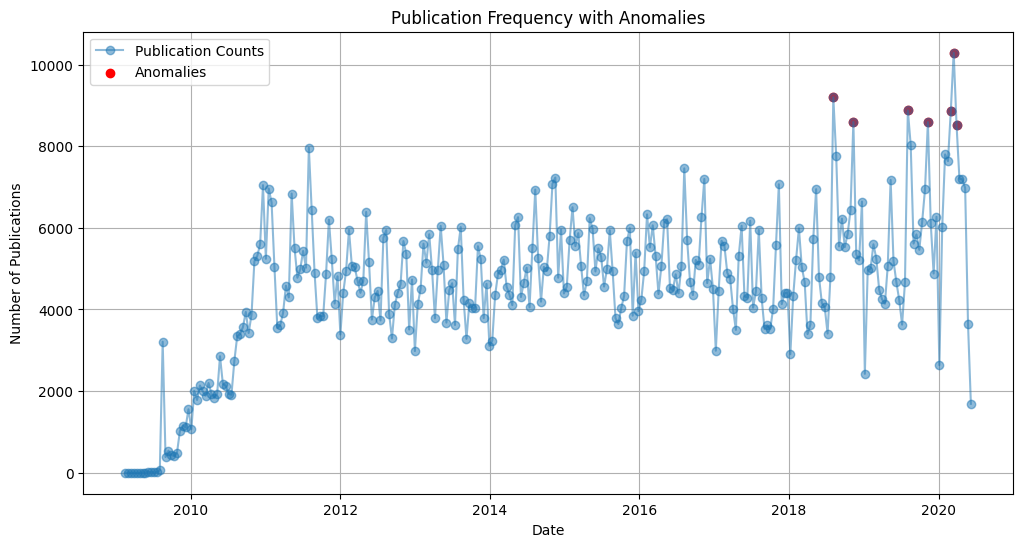

In [14]:
from scipy.stats import zscore

# Calculate z-scores to detect anomalies
z_scores = zscore(publication_counts)
anomalies = publication_counts[z_scores > 2]  # Threshold for anomaly detection

plt.figure(figsize=(12, 6))
plt.plot(publication_counts.index, publication_counts, label='Publication Counts', marker='o', linestyle='-', alpha=0.5)
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.title('Publication Frequency with Anomalies')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()


# Publisher Analysis
## Tasks
 * Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
 * If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.


In [49]:
df.head()

,headline,url,publisher,stock,headline_length,headline_ploarity,significant_words,polarity_figure
date,,,,,,,,
NaT,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,neutral,"[stock, hit, high, friday]",0.0
NaT,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,neutral,"[stock, hit, high, wednesday]",0.0
NaT,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,neutral,"[71, biggest, mover, friday]",0.0
NaT,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,neutral,"[46, stock, move, friday, session]",0.0
NaT,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,neutral,"[b, secur, maintain, neutral, agil, technolog,...",0.0


In [64]:
# lets count the number of occurance for each publisher and place it on a variable publishers_count
publishers_count = df["publisher"].value_counts()
print(publishers_count)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [67]:
top_publisher_name = publishers_count.idxmax()
number_of_top_publishers_publication = publishers_count.max();
print(f"{top_publisher_name} is the top publisher among publishers with publishing number of {number_of_top_publishers_publication}.")

Paul Quintaro is the top publisher among publishers with publishing number of 228373.


In [95]:
# To figure the degree of positivity or negativity of the publishser's comments.
average_polarity = df.groupby('publisher')["polarity_figure"].mean()
sorted_polarity = average_polarity.reindex(average_polarity.abs().sort_values(ascending=False).index)
print(sorted_polarity)

publisher
Eric Martin                    1.0
Brett Phillips                 1.0
Spencer James Lawrence        -0.9
Ben Reynolds                   0.8
giovannimola                   0.8
                              ... 
jennifer25anthony@gmail.com    0.0
Andrew Moran                   0.0
Andrew Aziz                    0.0
AlphaClone                     0.0
Jordan Stone                   0.0
Name: polarity_figure, Length: 1034, dtype: float64


In [103]:
# We now see that the among top 3 publishers eric Martin and Brett Phillips are moststly a positive publishers while Spencer James Lawrence is not.
print(f"{sorted_polarity[0: 3]}")

publisher
Eric Martin               1.0
Brett Phillips            1.0
Spencer James Lawrence   -0.9
Name: polarity_figure, dtype: float64


In [105]:
df.tail()

,headline,url,publisher,stock,headline_length,headline_ploarity,significant_words,polarity_figure
date,,,,,,,,
2011-08-29,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,38,positive,"[top, narrow, base, index, august, 29]",0.15
2011-06-22,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,52,positive,"[recap, wednesday, top, percentag, gainer, loser]",0.15
2011-06-21,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,56,neutral,"[updat, oppenheim, color, china, zenix, auto, ...",0.00
2011-06-21,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX,54,neutral,"[oppenheim, initi, china, zenix, outperform, 8...",0.00
2011-05-12,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,ZX,81,neutral,"[china, zenix, auto, intern, open, trade, ipo,...",0.00
